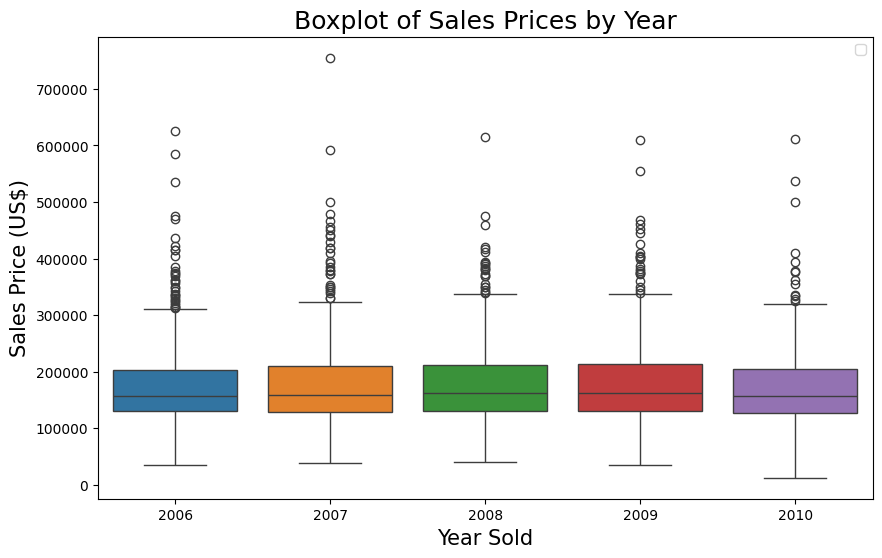

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
Ames = pd.read_csv('Ames.csv')

# Convert 'YrSold' to a categorical variable
Ames['YrSold'] = Ames['YrSold'].astype('category')
plt.figure(figsize=(10, 6))
sns.boxplot(x=Ames['YrSold'], y=Ames['SalePrice'], hue=Ames['YrSold'])
plt.title('Boxplot of Sales Prices by Year', fontsize=18)
plt.xlabel('Year Sold', fontsize=15)
plt.ylabel('Sales Price (US$)', fontsize=15)
plt.legend('')
plt.show()

In [3]:
import pandas as pd

Ames = pd.read_csv('Ames.csv')

# Calculating mean and median sales price by year
summary_table = Ames.groupby('YrSold')['SalePrice'].agg(['mean', 'median'])
# Rounding the values for better presentation
summary_table = summary_table.round(2)
print(summary_table)

             mean    median
YrSold                     
2006    176615.62  157000.0
2007    179045.08  159000.0
2008    178170.02  162700.0
2009    180387.64  162000.0
2010    173971.67  157900.0


In [9]:
import pandas as pd
import scipy.stats as stats

Ames = pd.read_csv('Ames.csv')

# Perform the ANOVA
f_value, p_value = stats.f_oneway(*[Ames['SalePrice'][Ames['YrSold'] == year] for year in Ames['YrSold'].unique()])
print(f_value, p_value)

0.4478735462379817 0.774024927554816


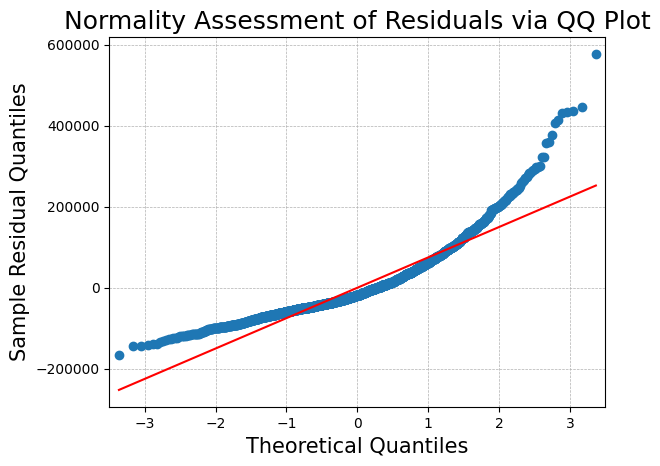

In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Leer el archivo CSV
Ames = pd.read_csv('Ames.csv')

# Ajustar un modelo de regresión lineal ordinaria (OLS)
model = sm.OLS(Ames['SalePrice'], Ames['YrSold'].astype('int')).fit()

# Obtener los residuos del modelo (diferencia entre valor real y predicho)
residuals = model.resid

# Hacer el gráfico QQ para verificar normalidad de los residuos
sm.qqplot(residuals, line='s')
plt.title('Normality Assessment of Residuals via QQ Plot', fontsize=18)
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Residual Quantiles', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [17]:
# Importar la prueba de Shapiro-Wilk desde scipy.stats
from scipy.stats import shapiro

# Aplicar la prueba de normalidad de Shapiro-Wilk a los residuos
shapiro_stat, shapiro_p = shapiro(residuals)

# Imprimir los resultados
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p}")

Shapiro-Wilk Test Statistic: 0.8774482066710075
P-value: 4.273531435344436e-41


In [19]:
# Check for equal variances using Levene's test
levene_stat, levene_p = stats.levene(*[Ames['SalePrice'][Ames['YrSold'] == year] for year in Ames['YrSold'].unique()])

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-value: {levene_p}")

Levene's Test Statistic: 0.2514412478357097
P-value: 0.9088910499612235


F-value: 0.4478735462379817
p-value: 0.774024927554816


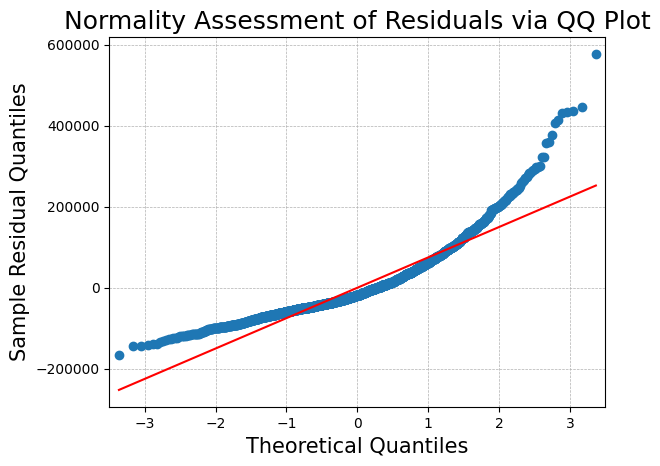

Shapiro-Wilk Test Statistic: 0.8774482066710075
P-value: 4.273531435344436e-41
Levene's Test Statistic: 0.2514412478357097
P-value: 0.9088910499612235


In [21]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro

# Cargar el conjunto de datos
Ames = pd.read_csv('Ames.csv')

# =======================
# ANÁLISIS DE VARIANZA (ANOVA)
# =======================

f_value, p_value = stats.f_oneway(*[
    Ames['SalePrice'][Ames['YrSold'] == year]
    for year in Ames['YrSold'].unique()
])

print("F-value:", f_value)
print("p-value:", p_value)

# =======================
# RESIDUOS DEL MODELO LINEAL (OLS)
# =======================

model = sm.OLS(Ames['SalePrice'], Ames['YrSold'].astype('int')).fit()
residuals = model.resid

# =======================
# QQ-PLOT para verificar normalidad de los residuos
# =======================

sm.qqplot(residuals, line='s')
plt.title('Normality Assessment of Residuals via QQ Plot', fontsize=18)
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Residual Quantiles', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# =======================
# PRUEBA DE NORMALIDAD (Shapiro-Wilk)
# =======================

shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p}")

# =======================
# PRUEBA DE HOMOCEDASTICIDAD (Levene)
# =======================

levene_stat, levene_p = stats.levene(*[
    Ames['SalePrice'][Ames['YrSold'] == year]
    for year in Ames['YrSold'].unique()
])

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-value: {levene_p}")

In [24]:
# Perform the Kruskal-Wallis H-test
H_statistic, kruskal_p_value = stats.kruskal(*[Ames['SalePrice'][Ames['YrSold'] == year] for year in Ames['YrSold'].unique()])

print(H_statistic, kruskal_p_value)

2.1330989438609236 0.7112941815590765


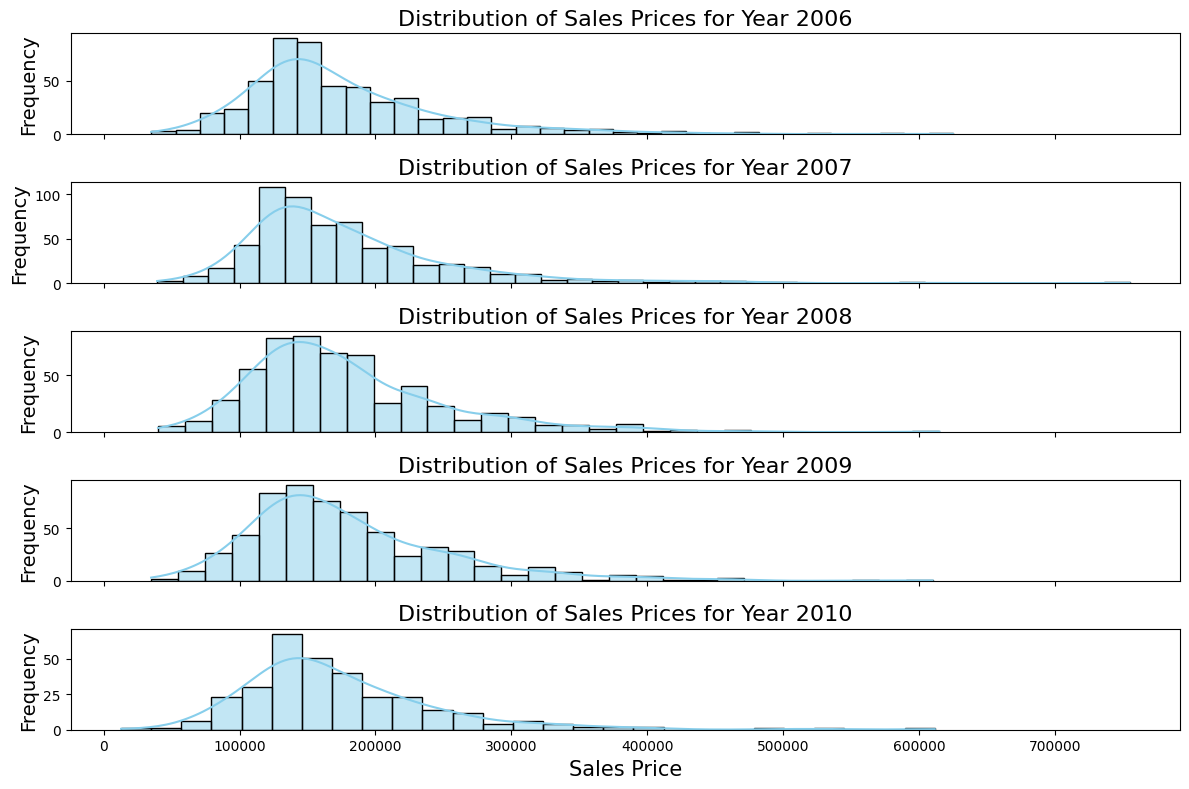

In [29]:
# Plot histograms of Sales Price for each year
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 8), sharex=True)

for idx, year in enumerate(sorted(Ames['YrSold'].unique())):
    sns.histplot(
        Ames[Ames['YrSold'] == year]['SalePrice'],
        kde=True,
        ax=axes[idx],
        color='skyblue'
    )
    axes[idx].set_title(f'Distribution of Sales Prices for Year {year}', fontsize=16)
    axes[idx].set_ylabel('Frequency', fontsize=14)

    if idx == 4:
        axes[idx].set_xlabel('Sales Price', fontsize=15)
    else:
        axes[idx].set_xlabel('')

plt.tight_layout()
plt.show()

In [30]:
# Ejecutar la prueba de Kolmogorov-Smirnov (KS Test) desde scipy.stats
from scipy.stats import ks_2samp

# Crear un diccionario para guardar resultados
results = {}

# Comparar cada par único de años
for i, year1 in enumerate(sorted(Ames['YrSold'].unique())):
    for j, year2 in enumerate(sorted(Ames['YrSold'].unique())):
        if i < j:
            ks_stat, ks_p = ks_2samp(
                Ames[Ames['YrSold'] == year1]['SalePrice'],
                Ames[Ames['YrSold'] == year2]['SalePrice']
            )
            results[f"{year1} vs {year2}"] = (ks_stat, ks_p)

# Convertir los resultados a un DataFrame para mostrar en tabla
ks_df = pd.DataFrame(results).transpose()
ks_df.columns = ['KS Statistic', 'P-value']
ks_df.reset_index(inplace=True)
ks_df.rename(columns={'index': 'Years Compared'}, inplace=True)

# Mostrar los resultados
print(ks_df)

  Years Compared  KS Statistic   P-value
0   2006 vs 2007      0.038042  0.798028
1   2006 vs 2008      0.052802  0.421325
2   2006 vs 2009      0.062235  0.226623
3   2006 vs 2010      0.040006  0.896946
4   2007 vs 2008      0.039539  0.732841
5   2007 vs 2009      0.044231  0.586558
6   2007 vs 2010      0.051508  0.620135
7   2008 vs 2009      0.032488  0.908322
8   2008 vs 2010      0.052752  0.603031
9   2009 vs 2010      0.053236  0.586128


Kruskal-Wallis H-statistic: 2.1330989438609236
P-value: 0.7112941815590765


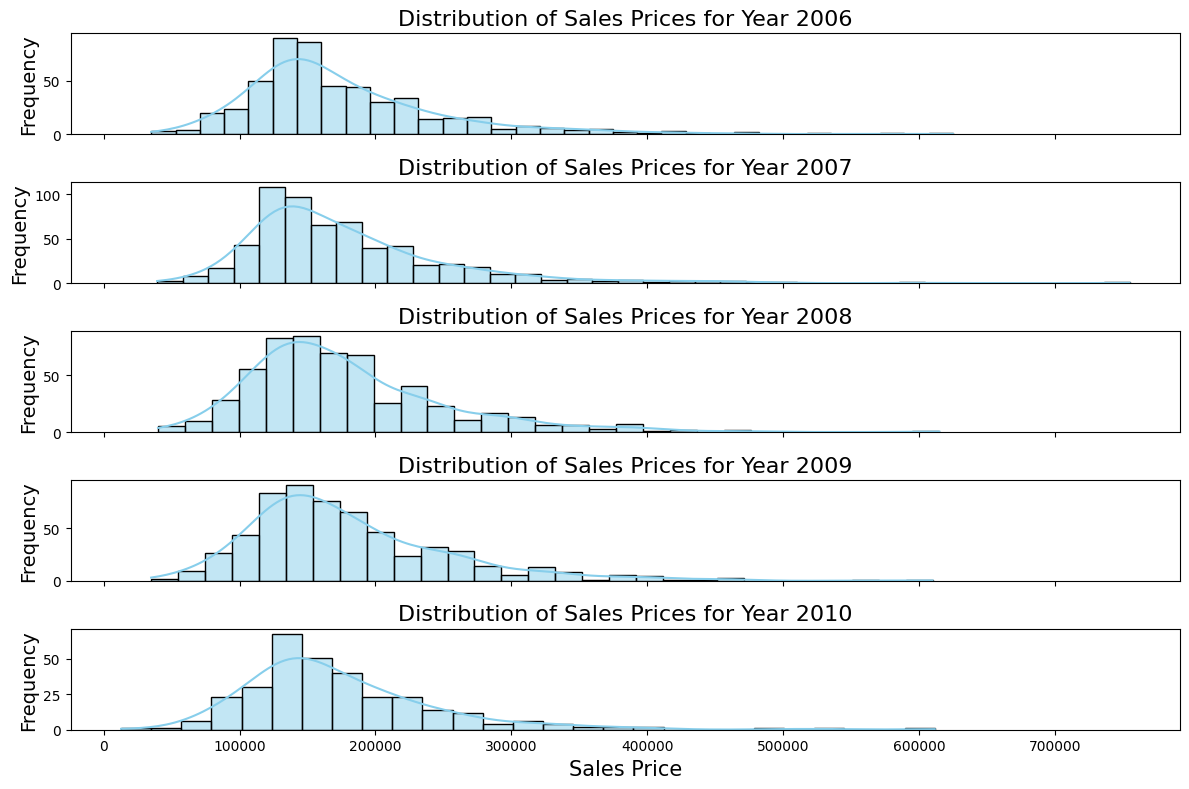

  Years Compared  KS Statistic   P-value
0   2006 vs 2007      0.038042  0.798028
1   2006 vs 2008      0.052802  0.421325
2   2006 vs 2009      0.062235  0.226623
3   2006 vs 2010      0.040006  0.896946
4   2007 vs 2008      0.039539  0.732841
5   2007 vs 2009      0.044231  0.586558
6   2007 vs 2010      0.051508  0.620135
7   2008 vs 2009      0.032488  0.908322
8   2008 vs 2010      0.052752  0.603031
9   2009 vs 2010      0.053236  0.586128


In [33]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Cargar el dataset
Ames = pd.read_csv('Ames.csv')

# ================================
# Test de Kruskal-Wallis
# ================================
H_statistic, kruskal_p_value = stats.kruskal(*[
    Ames['SalePrice'][Ames['YrSold'] == year]
    for year in Ames['YrSold'].unique()
])

print("Kruskal-Wallis H-statistic:", H_statistic)
print("P-value:", kruskal_p_value)

# ================================
# Histogramas de precios por año
# ================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 8), sharex=True)

for idx, year in enumerate(sorted(Ames['YrSold'].unique())):
    sns.histplot(
        Ames[Ames['YrSold'] == year]['SalePrice'],
        kde=True,
        ax=axes[idx],
        color='skyblue'
    )
    axes[idx].set_title(f'Distribution of Sales Prices for Year {year}', fontsize=16)
    axes[idx].set_ylabel('Frequency', fontsize=14)

    if idx == 4:
        axes[idx].set_xlabel('Sales Price', fontsize=15)
    else:
        axes[idx].set_xlabel('')

plt.tight_layout()
plt.show()

# ================================
# Prueba de Kolmogorov-Smirnov entre años
# ================================
results = {}

for i, year1 in enumerate(sorted(Ames['YrSold'].unique())):
    for j, year2 in enumerate(sorted(Ames['YrSold'].unique())):
        if i < j:
            ks_stat, ks_p = ks_2samp(
                Ames[Ames['YrSold'] == year1]['SalePrice'],
                Ames[Ames['YrSold'] == year2]['SalePrice']
            )
            results[f"{year1} vs {year2}"] = (ks_stat, ks_p)

# Convertir resultados en DataFrame
ks_df = pd.DataFrame(results).transpose()
ks_df.columns = ['KS Statistic', 'P-value']
ks_df.reset_index(inplace=True)
ks_df.rename(columns={'index': 'Years Compared'}, inplace=True)

# Mostrar resultados de KS
print(ks_df)